In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습/9주차 강의/TSLA.csv')

In [2]:
# 사용할 특성만 추출
features = ['Open', 'High', 'Low', 'Close']
data_df = df[features]

In [3]:
# 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_df)

In [4]:
# 3. 시퀀스 생성
window = 4   # 최근 종가 4개 → 다음 종가 예측

n_features_in = 3 # 입력 특성 Open, High, Low
n_features_out = 1 # 출력 특성 Close

X, y = [], []
for i in range(len(data_scaled)-window):
    X.append(data_scaled[i:i+window, 0:n_features_in]) # 입력 특성까지만 가져옴
    y.append(data_scaled[i+window, 3]) # 출력 특성만 가져옴
X, y = np.array(X), np.array(y)

In [5]:
print('전체 데이터의 크기 :', len(X), len(y))
print('샘플 수 : ',X.shape, y.shape)

전체 데이터의 크기 : 2952 2952
샘플 수 :  (2952, 4, 3) (2952,)


In [6]:
train_size = int(len(y) * 0.7)
train_X = np.array(X[0 : train_size])
train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
test_X = np.array(X[train_size : len(X)])
test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (2066, 4, 3) (2066,)
테스트 데이터의 크기 : (886, 4, 3) (886,)


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,n_features_in)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2878e-04
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8344e-06
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5626e-06
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9227e-06
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7623e-06
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.6427e-06
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0478e-06
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8044e-06
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5497e-06
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5133e-06
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0699e-06
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7940e-06
Epoch 13/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7055e-06
Epoch 14/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5771e-06
E

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
5166.951739888427
71.88151180858975


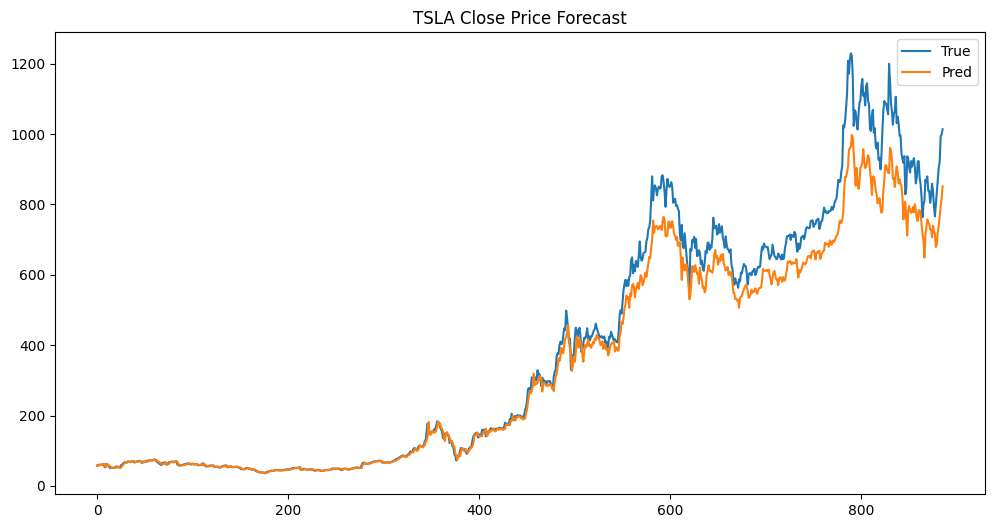

In [9]:
# 5. 예측
pred = model.predict(test_X)

# inverse_transform으로 그래프를 그리려 하니 오류 발생
# -> 스케일러는 특성 4개로 학습했기 때문에 역변환 시에도 4개를 넣어주어야 함
# 따라서 더미 배열을 만들어 원하는 곳에만 원하는 데이터를 삽입해 역변환 시도

n_features = 4
# test_y
# (886, 4) 크기의 0으로 채워진 더미 배열 생성
dummy_test = np.zeros((len(test_y), n_features))
# 4번째 열에만 Close 값 삽입
dummy_test[:, 3] = test_y.ravel()
# 전체 역변환 뒤 Close만 추출
y_test_original = scaler.inverse_transform(dummy_test)[:, 3]


# (886, 4) 크기의 0으로 채워진 더미 배열 생성
dummy_pred = np.zeros((len(pred), n_features))
# 4번째 열에만 예측값 삽입
dummy_pred[:, 3] = pred.ravel()
# 전체 역변환 뒤 예측값 추출
pred_original = scaler.inverse_transform(dummy_pred)[:, 3]

# 7. 평가 (MSE) 및 시각화
mse = mean_squared_error(y_test_original, pred_original)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

plt.figure(figsize=(12, 6))
plt.title("TSLA Close Price Forecast")
plt.plot(y_test_original, label='True')
plt.plot(pred_original, label='Pred')
plt.legend()
plt.show()